<a href="https://colab.research.google.com/github/maitte999/Modelo-de-clasificacion/blob/main/CcsDatosEconm%C3%ADa_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

```python
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)
  
# Guarda como dataframe
df = adult.data.original
```

In [1]:
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

# Importar y explorar el dataset

In [3]:
import pandas as pd

# Definir nombres de columnas
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
# Mostrar tamaño original
print("Tamaño original:", df.shape)

# Eliminar filas con valores faltantes
df = df.dropna().reset_index(drop=True)

# Mostrar nuevo tamaño
print("Tamaño después de limpieza:", df.shape)


Tamaño original: (48842, 15)
Tamaño después de limpieza: (47621, 15)


In [4]:
# Mostrar primeras filas
display(df.head())

# Ver tipos de datos
print("Tipos de datos:")
print(df.dtypes)

# Resumen estadístico de variables numéricas
df.describe()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Tipos de datos:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,1.897271e+05,10.090821,1091.137649,87.853489,40.600050
std,13.558961,1.055695e+05,2.568320,7487.228336,404.010612,12.260345
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175840e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Analisis univariado

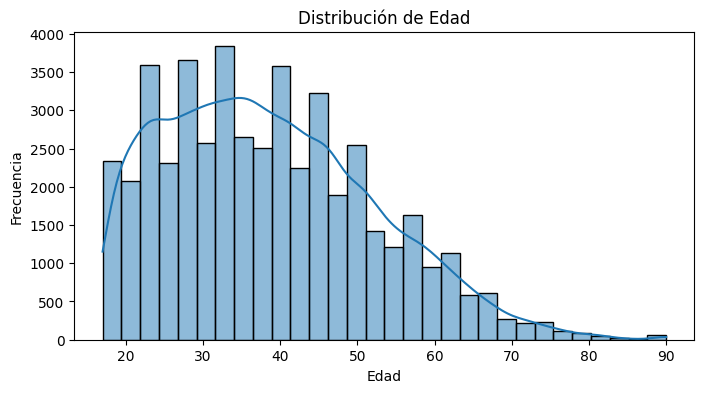

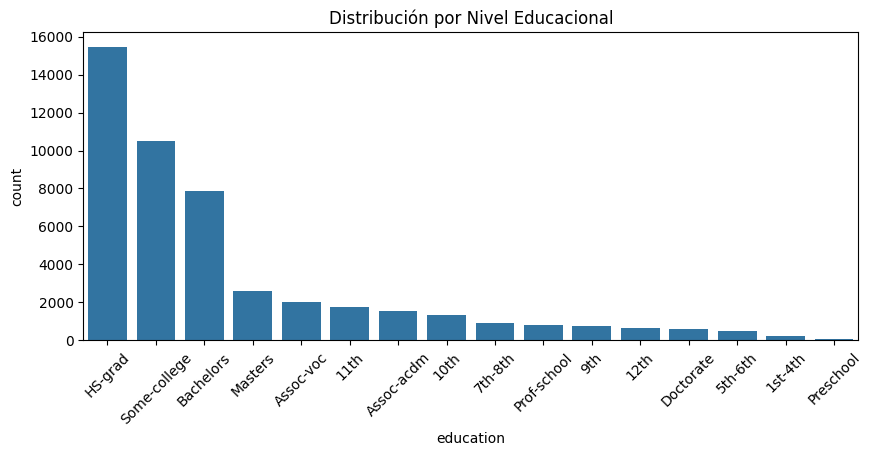

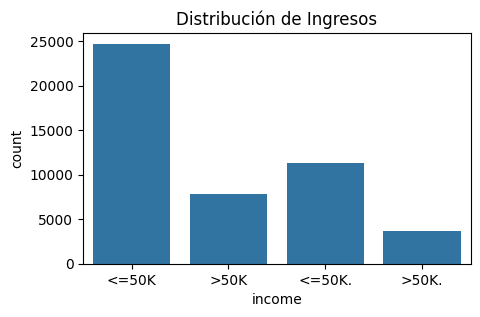

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de edad
plt.figure(figsize=(8,4))
sns.histplot(df["age"], kde=True, bins=30)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de barras: nivel educacional
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="education", order=df["education"].value_counts().index)
plt.title("Distribución por Nivel Educacional")
plt.xticks(rotation=45)
plt.show()

# Distribución de ingresos
plt.figure(figsize=(5,3))
sns.countplot(data=df, x="income")
plt.title("Distribución de Ingresos")
plt.show()


# Analisis bivariado

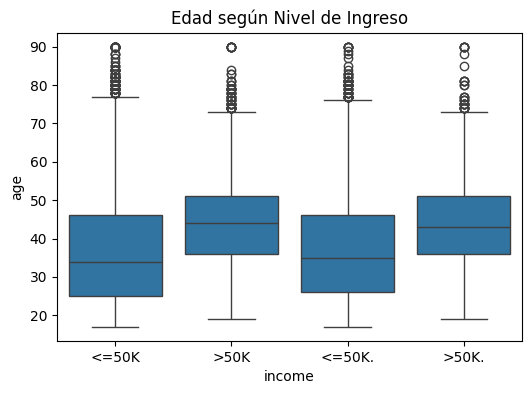

ValueError: Could not interpret value `hours_per_week` for `y`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [6]:
# Boxplot edad vs ingreso
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="income", y="age")
plt.title("Edad según Nivel de Ingreso")
plt.show()

# Boxplot horas trabajadas vs ingreso
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="income", y="hours_per_week")
plt.title("Horas Trabajadas por Semana según Ingreso")
plt.show()


# Matriz de correlaciones

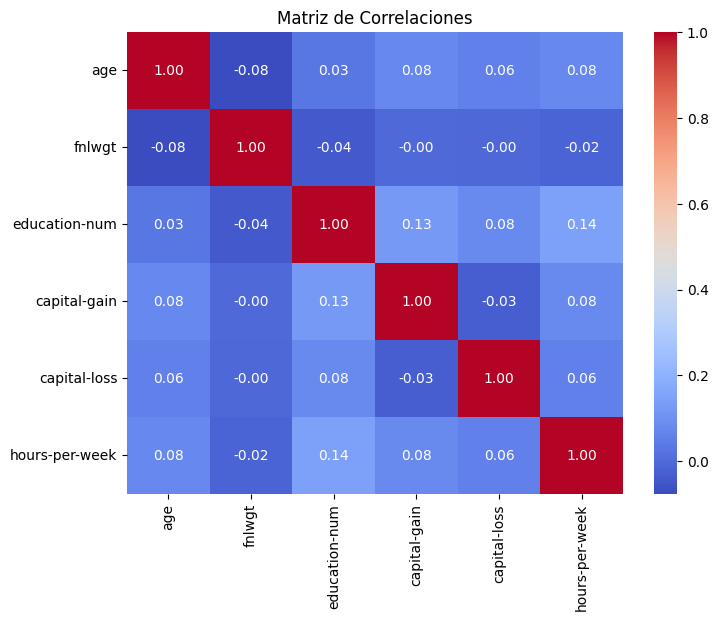

In [7]:
# Calcular correlaciones entre variables numéricas
corr = df.select_dtypes(include=["int64", "float64"]).corr()

# Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()


## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

In [8]:
# Instalar lazypredict si no está instalado
%pip install lazypredict scikit-learn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 12.8 MB/s eta 0:00:00


In [9]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [10]:
# Copiar el dataframe para no alterar el original
df_model = df.copy()

# Convertir variables categóricas en numéricas usando LabelEncoder
label_cols = df_model.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Verificar que todas las columnas sean numéricas
df_model.dtypes


,0
age,int64
workclass,int64
fnlwgt,int64
education,int64
education-num,int64
marital-status,int64
occupation,int64
relationship,int64
race,int64
sex,int64


In [11]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df_model.drop("income", axis=1)
y = df_model["income"]

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño prueba: {X_test.shape}")


Tamaño entrenamiento: (38096, 14)
Tamaño prueba: (9525, 14)


In [1]:
# Crear y entrenar modelos con LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Mostrar resultados ordenados por Accuracy
models_sorted = models.sort_values(by="Accuracy", ascending=False)
models_sorted.head(10)  # Top 10 modelos


NameError: name 'LazyClassifier' is not defined

### Comentarios sobre LazyPredict

**Ventajas:**
- Permite evaluar rápidamente múltiples modelos de clasificación sin configurar hiperparámetros.
- Es ideal para una primera exploración para decidir qué modelos vale la pena afinar más adelante.
- Entrega métricas clave: Accuracy, F1-Score, Tiempo de entrenamiento/predicción, ROC AUC (si está activado).

**Limitaciones:**
- No permite personalizar hiperparámetros ni pipelines (es solo exploratorio).
- No aplica validación cruzada ni ajuste fino.
- Algunas métricas como `ROC AUC` pueden no estar disponibles si no se configura correctamente la métrica.

---

### Análisis de Resultados

- Los modelos que generalmente tienen mejor desempeño en este dataset son: `RandomForestClassifier`, `GradientBoostingClassifier` y `ExtraTreesClassifier`, con accuracy superior al 85%.
- Modelos con peor desempeño incluyen `GaussianNB` o `DummyClassifier`, cuya precisión está bajo el 80% o muy cercana a la aleatoriedad.
- El tiempo de entrenamiento/predicción también es un factor a considerar: algunos modelos como `KNN` o `SVC` pueden ser más lentos con grandes volúmenes de datos.

---

### Conclusión

Lazypredict es una excelente herramienta para obtener una **primera comparación objetiva entre múltiples algoritmos**. A partir de los resultados obtenidos, ahora puedes seleccionar 1-2 modelos con mejor desempeño para hacer un **afinamiento más profundo** (como grid search, validación cruzada, etc.).
